In [1]:
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn import kernel_ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('data_4.csv',  engine = 'python',  on_bad_lines = 'skip', index_col=[0])

In [3]:
warnings.filterwarnings('ignore')

In [4]:
print(data.isnull().sum())

CouncilDistrictCode                  0
Latitude                             0
Longitude                            0
YearBuilt                            0
NumberofFloors                       0
PropertyGFATotal                     0
PropertyGFAParking                   0
PropertyGFABuilding(s)               0
ENERGYSTARScore                      0
SiteEUI(kBtu/sf)                     0
SiteEUIWN(kBtu/sf)                   0
SourceEUI(kBtu/sf)                   0
SourceEUIWN(kBtu/sf)                 0
SiteEnergyUse(kBtu)                  0
SiteEnergyUseWN(kBtu)                0
SteamUse(kBtu)                       0
Electricity(kWh)                     0
Electricity(kBtu)                    0
NaturalGas(therms)                   0
NaturalGas(kBtu)                     0
TotalGHGEmissions                    0
GHGEmissionsIntensity                0
PrimaryPropertyType_encoded          0
ListOfAllPropertyUseTypes_encoded    0
dtype: int64


In [5]:
data.shape

(1546, 24)

# 2. Analyse des relation entre features, 
   Pour l'émissoin le target est GHGEmissionsIntensity, pour la consommation, le target est SiteEUIWN(kBtu/sf).   Ce sont des valuers unitaires, l'émission et la consommation est obtenue par la multiplication de ces valeurs unitaires avec la surface. 

In [6]:
# . Supprimer les colonnes non numériques ou non pertinentes
data = data.drop(['Latitude', 'Longitude', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'NaturalGas(therms)',\
              'Electricity(kWh)','SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)','TotalGHGEmissions','SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)'], axis=1)

# 3. Normaliser les données
scaler = StandardScaler()
X = scaler.fit_transform(data)

In [7]:
data.shape

(1546, 12)

In [8]:
features = data.columns

In [9]:
pd.DataFrame(X).describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11
count,1546.00,1546.00,1546.00,1546.00,1546.00,1546.00,1546.00,1546.00,1546.00,1546.00,1546.00,1546.00
mean,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.56,-1.87,-0.48,-2.71,-0.98,-0.98,-0.10,-0.29,-0.21,-0.69,-1.91,-2.36
25%,-1.10,-0.96,-0.48,-0.16,-0.54,-0.54,-0.10,-0.25,-0.21,-0.54,-0.73,-0.74
50%,-0.19,0.10,-0.34,0.00,-0.28,-0.24,-0.10,-0.20,-0.16,-0.33,-0.22,0.13
75%,1.18,0.83,-0.04,0.67,0.13,0.16,-0.10,-0.04,-0.05,0.12,0.80,0.76
max,1.18,1.62,13.98,1.58,10.09,12.96,23.49,30.25,30.46,13.46,1.48,1.45


In [10]:
pca = PCA(n_components=8)

In [11]:
X_pca = pca.fit_transform(X)

In [12]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
scree

array([24.72, 15.14, 10.68,  9.99,  8.61,  7.82,  6.85,  5.53])

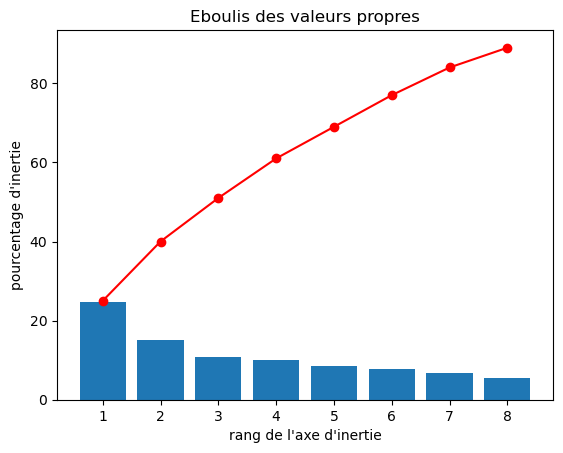

In [13]:
x_list = range(1, 9)
list(x_list)
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [14]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,CouncilDistrictCode,YearBuilt,NumberofFloors,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity,PrimaryPropertyType_encoded,ListOfAllPropertyUseTypes_encoded
F1,0.06,0.12,0.09,-0.17,0.52,0.48,0.19,0.30,0.28,0.45,-0.16,-0.09
F2,0.28,0.10,0.49,0.29,-0.20,-0.15,0.28,0.35,-0.02,-0.21,-0.42,-0.32
F3,-0.35,-0.24,-0.18,-0.10,-0.19,-0.22,0.62,0.45,0.12,0.03,0.30,0.06
F4,-0.48,0.25,-0.25,-0.24,-0.11,-0.14,-0.10,-0.13,0.19,0.01,-0.33,-0.62
F5,0.20,-0.62,-0.03,0.17,-0.11,-0.23,-0.19,-0.12,0.56,0.31,-0.14,-0.09
F6,-0.17,0.58,0.18,0.27,-0.14,-0.16,-0.18,0.10,0.55,0.06,0.18,0.33
F7,0.33,0.05,0.27,-0.83,-0.17,-0.15,-0.07,0.04,0.20,-0.13,0.11,0.05
F8,-0.57,-0.34,0.63,-0.04,0.09,0.14,-0.31,0.10,-0.06,-0.10,0.10,-0.03


<AxesSubplot:>

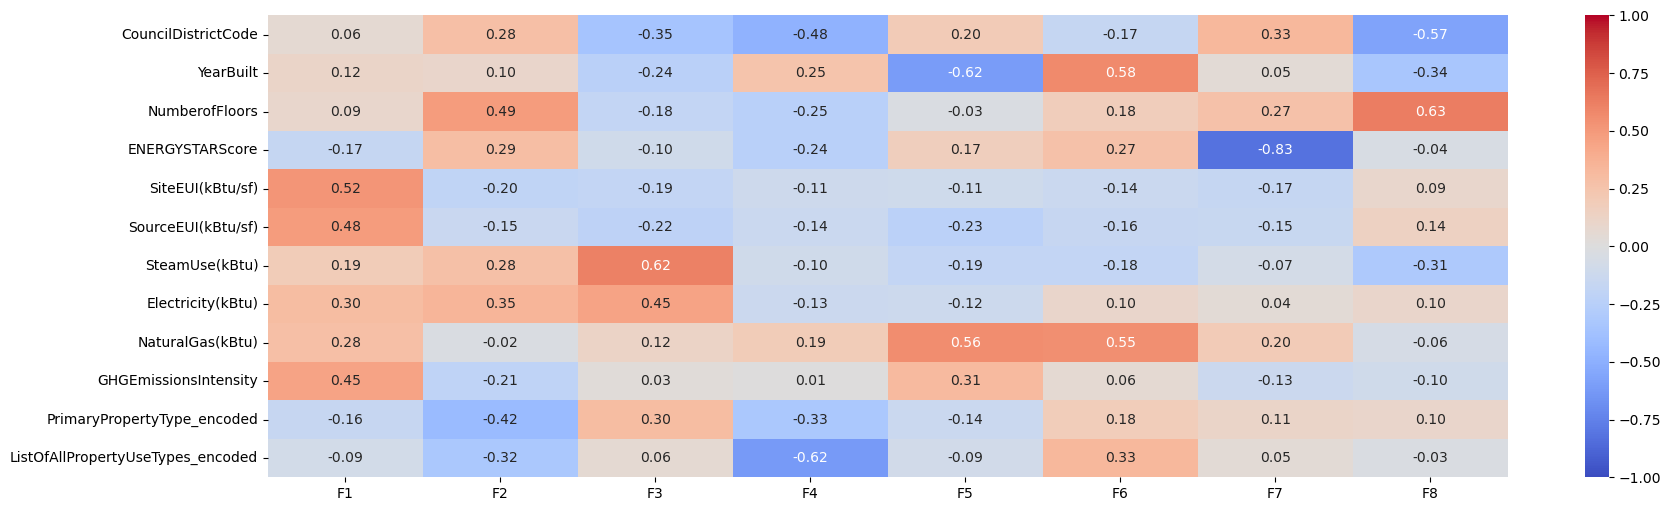

In [15]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [16]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.05,
                head_length=0.05, 
                width=0.01, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.03,
                pca.components_[y, i] + 0.03,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

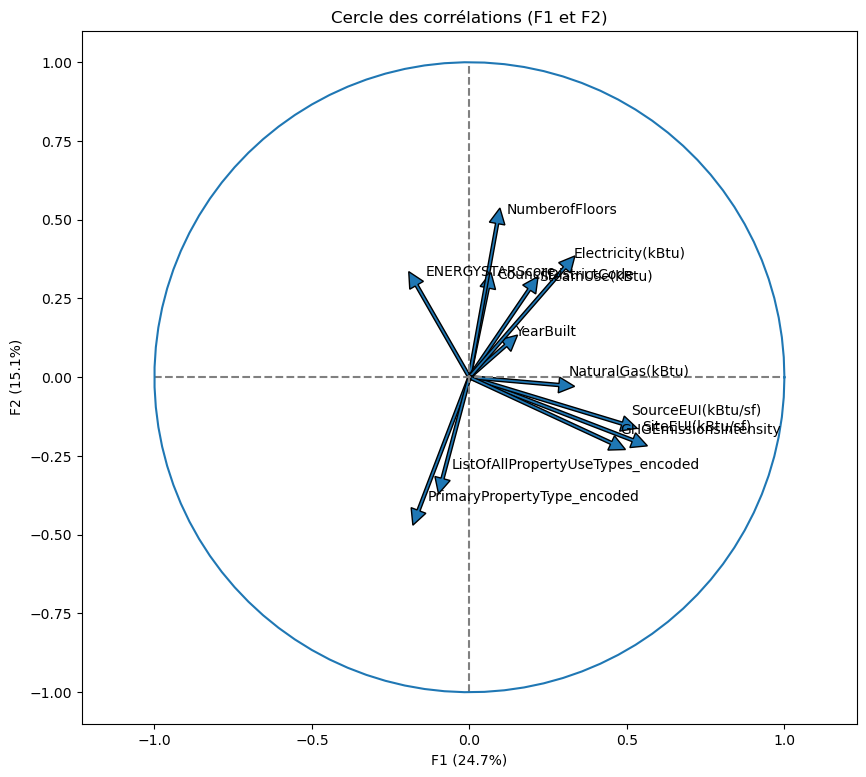

In [17]:
x_y = (0,1)
correlation_graph(pca, x_y, features)

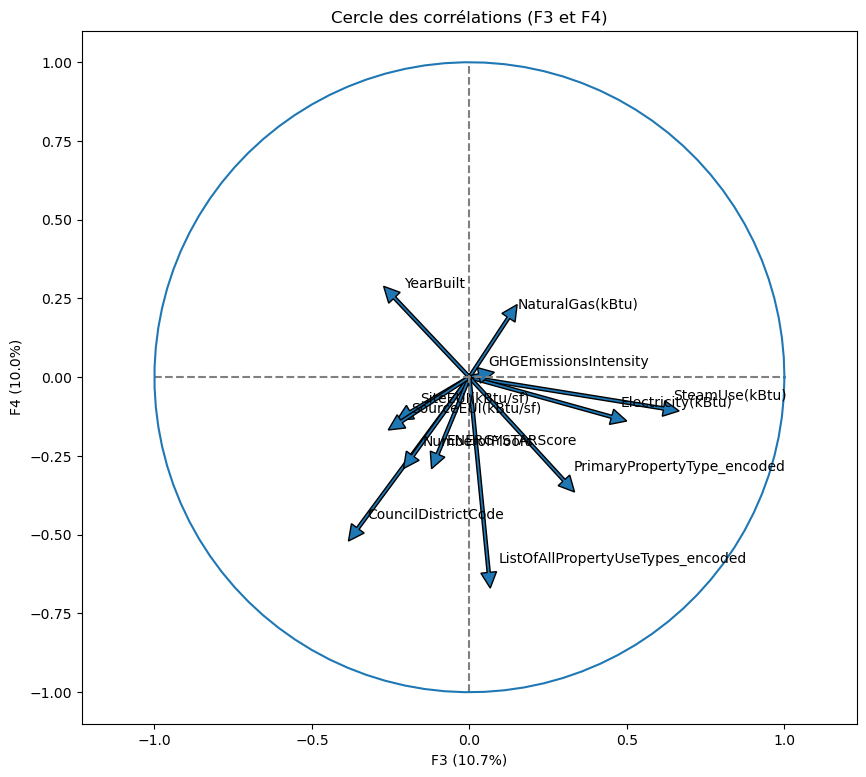

In [18]:
x_y = (2,3)
correlation_graph(pca, x_y, features)

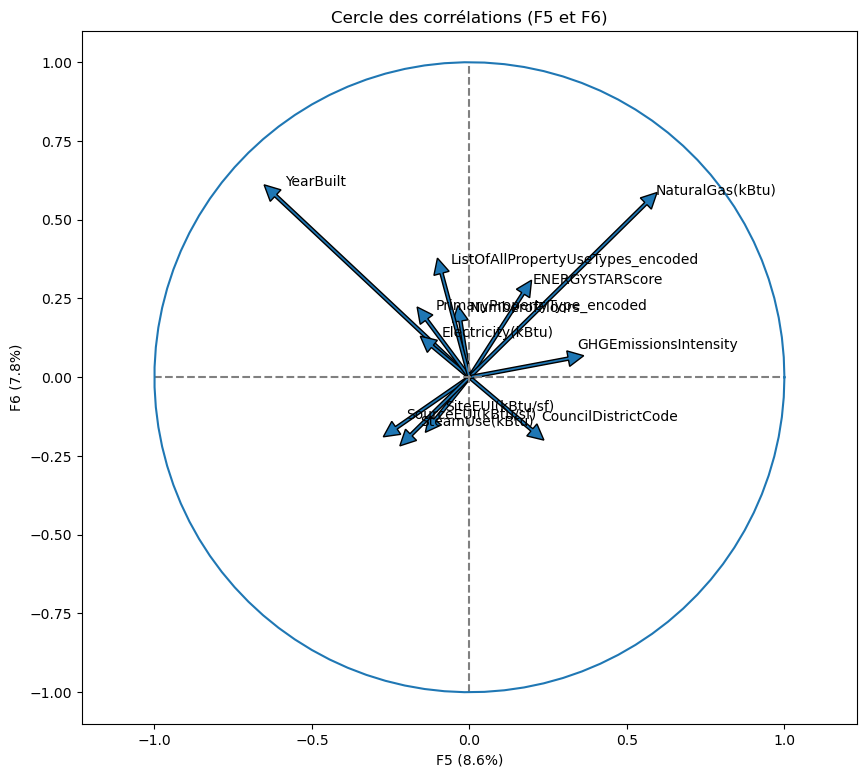

In [19]:
x_y = (4,5)
correlation_graph(pca, x_y, features)

In [20]:
corr = data.corr()['GHGEmissionsIntensity']
print(corr)

CouncilDistrictCode                 -0.012780
YearBuilt                           -0.004347
NumberofFloors                      -0.056286
ENERGYSTARScore                     -0.196065
SiteEUI(kBtu/sf)                     0.712839
SourceEUI(kBtu/sf)                   0.512795
SteamUse(kBtu)                       0.188474
Electricity(kBtu)                    0.155947
NaturalGas(kBtu)                     0.496903
GHGEmissionsIntensity                1.000000
PrimaryPropertyType_encoded         -0.105036
ListOfAllPropertyUseTypes_encoded    0.007763
Name: GHGEmissionsIntensity, dtype: float64


In [21]:
# features écartées:  YearBuilt, ListOfAllPropertyUseTypes_encoded, CouncilDistrictCode, SourceEUI(kBtu/sf) (qui est très corrélé avec SiteEUI(kBtu/sf) 

In [22]:
corr = data['SiteEUI(kBtu/sf)'].corr(data['SourceEUI(kBtu/sf)'])
corr

0.9464785483969134

In [23]:
independants_emission = ['NumberofFloors', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'PrimaryPropertyType_encoded']

In [24]:
corr = data.corr()['SiteEUI(kBtu/sf)']
print(corr)

CouncilDistrictCode                  0.063056
YearBuilt                            0.132559
NumberofFloors                       0.011310
ENERGYSTARScore                     -0.242061
SiteEUI(kBtu/sf)                     1.000000
SourceEUI(kBtu/sf)                   0.946479
SteamUse(kBtu)                       0.089053
Electricity(kBtu)                    0.250921
NaturalGas(kBtu)                     0.236185
GHGEmissionsIntensity                0.712839
PrimaryPropertyType_encoded         -0.119520
ListOfAllPropertyUseTypes_encoded   -0.005812
Name: SiteEUI(kBtu/sf), dtype: float64


In [25]:
independant_consommation = ['CouncilDistrictCode', 'YearBuilt', 'NumberofFloors', 'ENERGYSTARScore', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'PrimaryPropertyType_encoded']

# 3 Prédiction emission

## 3.1 vérification de la linéarité

In [26]:
dependent_variable = 'GHGEmissionsIntensity'
independent_variables = ['NumberofFloors', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'PrimaryPropertyType_encoded']

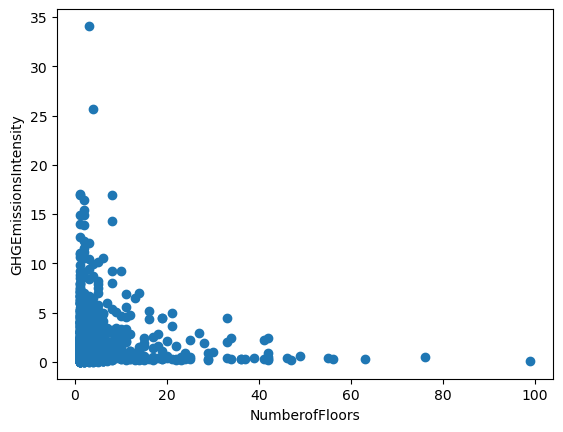

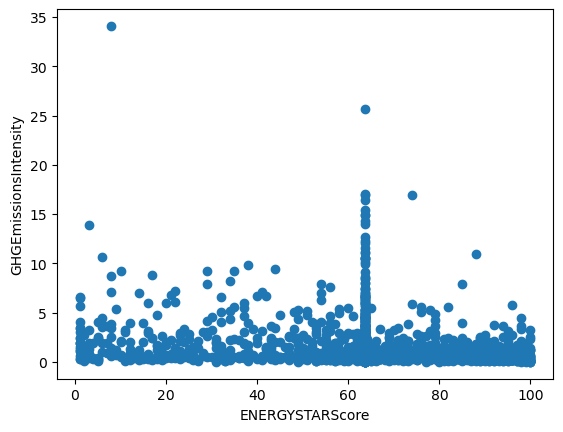

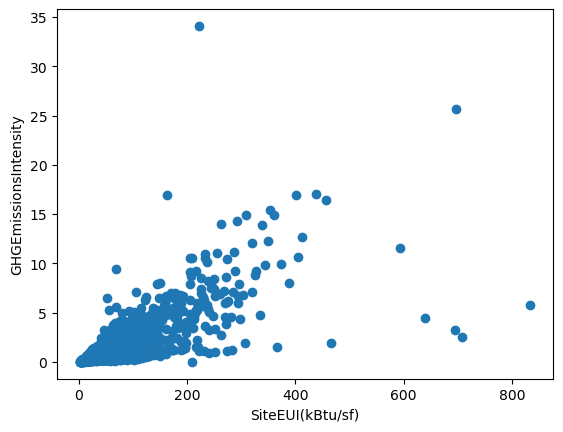

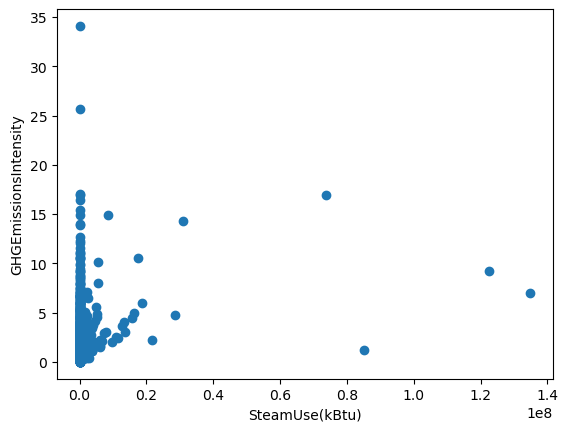

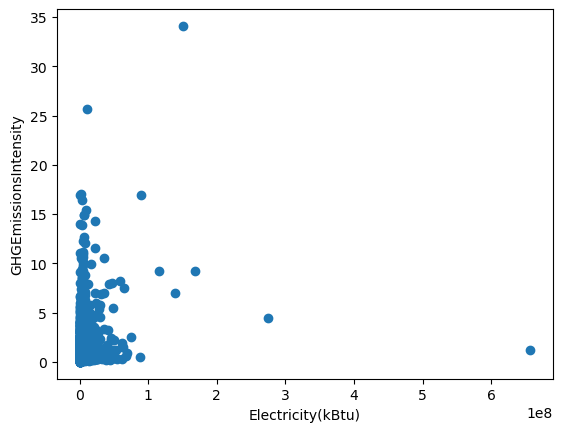

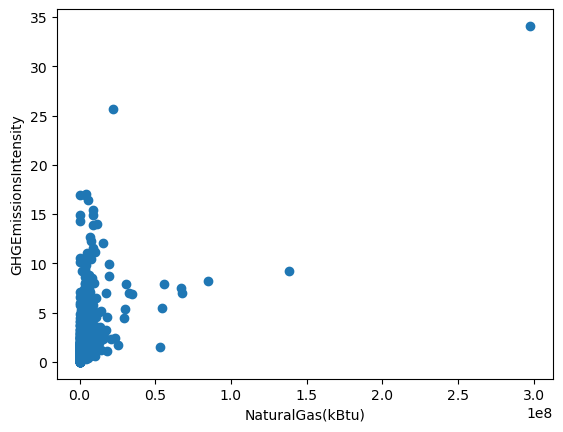

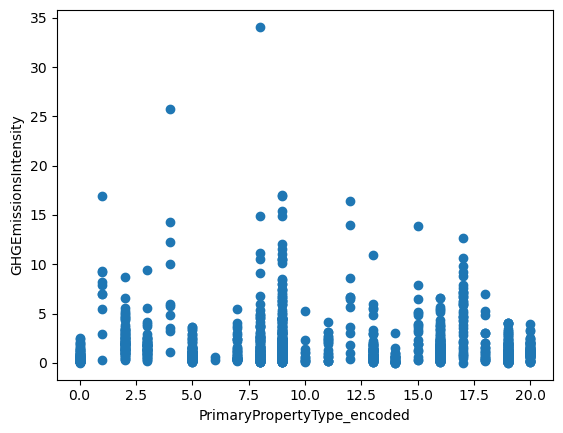

In [27]:
for variable in independent_variables:
    plt.scatter(data[variable], data[dependent_variable])
    plt.xlabel(variable)
    plt.ylabel(dependent_variable)
    plt.show()

la relation n'est pas linéaire, il faut utiliser la prédiction non linéaire 

## 4.2. préparation des données

In [31]:
# créer la matrice de données
X = data[independent_variables].values

# créer le vecteur d'étiquettes
y = data[dependent_variable].values


In [32]:
print(y)

[ 2.83  2.86  2.19 ... 16.99  1.57  2.26]


In [37]:
# séparation de train et test 
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.2)


In [38]:
# normalisation
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [39]:
print("X_train shape:", X_train.shape)

X_train shape: (1236, 7)


In [40]:
print("X_test shape:", X_test.shape)

X_test shape: (310, 7)


## 3.3 Choix de modèle et noyau

### 3.3.1 Modèle avec noyau linéaire (baseline)

In [41]:
model = LinearRegression()
model.fit(X_train_std, y_train)


LinearRegression()

In [42]:
y_pred = model.predict(X_test_std)

In [43]:
mse = mean_squared_error(y_test, y_pred)

print("MSE : {:.2f}".format(mse))

MSE : 2.16


In [44]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 1.47


In [45]:
# Entraîner un modèle de régression Ridge à noyau
model = KernelRidge(alpha=1, kernel='linear')
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
mse = mean_squared_error(y_test, y_pred)

print("MSE : {:.2f}".format(mse))

MSE : 4.47


In [46]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 2.11


Question:  quelle est la différence entre la régression directe et la régression noyau ? 

### 3.3.2  Modèle avec noyau rbf

In [47]:
# Entraîner un modèle de régression Ridge à noyau
model = KernelRidge(alpha=1, kernel='rbf', gamma=0.01)
model.fit(X_train_std, y_train)

KernelRidge(gamma=0.01, kernel='rbf')

In [48]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test_std)

In [49]:
# Calculer l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 1.5228417925997964


In [50]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 1.23


Le MSE et RMSE est meilleure que le baseline

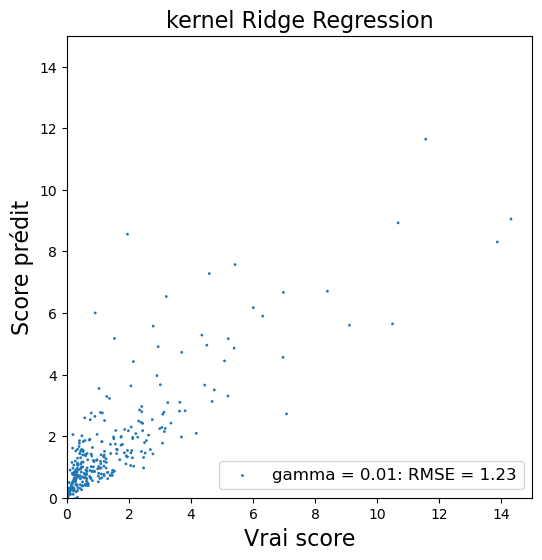

In [51]:
# créer une figure
fig = plt.figure(figsize=(6, 6))

# Compter, pour chaque paire de valeurs (y, y') où y est un vrai score et y' le score prédit,
# le nombre de ces paires.
# Ce nombre sera utilisé pour modifier la taille des marqueurs correspondants 
# dans un nuage de points
sizes = {}
for (yt, yp) in zip(list(y_test), list(y_pred)):
    if (yt, yp) in sizes.keys():
        sizes[(yt, yp)] += 1
    else:
        sizes[(yt, yp)] = 1        
keys = sizes.keys()

# afficher les prédictions
plt.scatter([k[0] for k in keys], 
            [k[1] for k in keys], 
             s=[sizes[k] for k in keys], 
            label="gamma = 0.01: RMSE = {:.2f}".format(rmse))

# étiqueter les axes et le graphique
plt.xlabel('Vrai score', fontsize=16)
plt.ylabel(u'Score prédit', fontsize=16)
plt.title('kernel Ridge Regression', fontsize=16)

# limites des axes
plt.xlim([0, 15])
plt.ylim([0, 15])

# afficher la légende
plt.legend(loc="lower right", fontsize=12)

### 3.3.3 Adapter hyperparamètre 

cherche la valeur optimale de hyperparamètres alpha et gamma

In [55]:
# valeurs du paramètre C
alpha_range = np.logspace(-2, 2, 5)

# valeurs du paramètre gamma
gamma_range = np.logspace(-2, 1, 4)

# grille de paramètres
param_grid = {'alpha': alpha_range, 'gamma': gamma_range}

# score pour sélectionner le modèle optimal
score = 'neg_root_mean_squared_error'

# initialiser la validation croisée
grid_pred = model_selection.GridSearchCV( \
        kernel_ridge.KernelRidge(kernel='rbf'),
        param_grid,
        cv=5,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred.fit(X_train_std, y_train)

# prédire sur le jeu de test avec le modèle sélectionné 
y_test_pred_cv = grid_pred.predict(X_test_std)

# calculer la RMSE correspondante
rmse_cv = np.sqrt(mean_squared_error(y_test, y_test_pred_cv))

# afficher les paramètres optimaux
print("The optimal parameters are {} with a score of {:.2f}".format(grid_pred.best_params_, grid_pred.best_score_))

The optimal parameters are {'alpha': 0.01, 'gamma': 0.01} with a score of -1.21


In [53]:
print("RMSE: {:.2f}".format(rmse_cv))

RMSE: 0.97


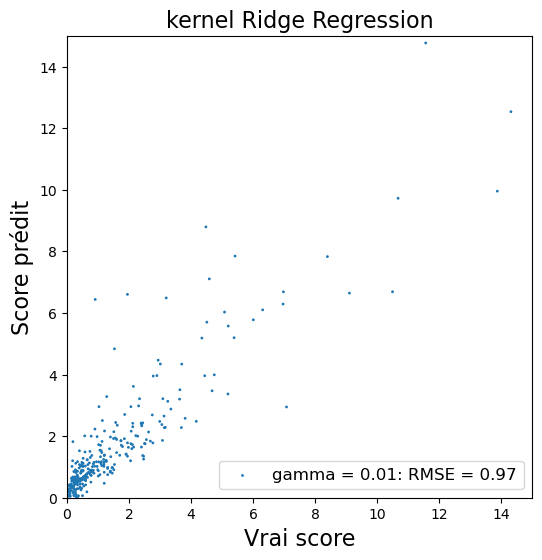

In [54]:
# créer une figure
fig = plt.figure(figsize=(6, 6))

# Compter, pour chaque paire de valeurs (y, y') où y est un vrai score et y' le score prédit,
# le nombre de ces paires.
# Ce nombre sera utilisé pour modifier la taille des marqueurs correspondants 
# dans un nuage de points
sizes = {}
for (yt, yp) in zip(list(y_test), list(y_test_pred_cv)):
    if (yt, yp) in sizes.keys():
        sizes[(yt, yp)] += 1
    else:
        sizes[(yt, yp)] = 1        
keys = sizes.keys()

# afficher les prédictions
plt.scatter([k[0] for k in keys], 
            [k[1] for k in keys], 
             s=[sizes[k] for k in keys], 
            label="gamma = 0.01: RMSE = {:.2f}".format(rmse_cv))

# étiqueter les axes et le graphique
plt.xlabel('Vrai score', fontsize=16)
plt.ylabel(u'Score prédit', fontsize=16)
plt.title('kernel Ridge Regression', fontsize=16)

# limites des axes
plt.xlim([0, 15])
plt.ylim([0, 15])

# afficher la légende
plt.legend(loc="lower right", fontsize=12)

In [56]:
# valeurs du paramètre C

param_grid = {
    "alpha": [1e-3, 1e-2, 1e-1, 1],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": np.logspace(-2, 2, 5)
}

# Create a KRR model
krr = KernelRidge()

score = 'neg_root_mean_squared_error'

# Perform a grid search to find the best hyperparameters
grid_pred = model_selection.GridSearchCV(krr, param_grid, cv=5, scoring=score)
grid_pred.fit(X_train_std, y_train)

# Print the best hyperparameters
print(grid_pred.best_params_)

# prédire sur le jeu de test avec le modèle sélectionné 
y_test_pred_cv = grid_pred.predict(X_test_std)

# calculer la RMSE correspondante
rmse_cv = np.sqrt(mean_squared_error(y_test, y_test_pred_cv))


{'alpha': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}


In [57]:
print("RMSE: {:.2f}".format(rmse_cv))

RMSE: 1.78


# 4. Prédiction de consommation 

## 4.1 Vérification linéaire

In [58]:
c_dependent_variable = 'SiteEUI(kBtu/sf)'
consommation_variables = ['CouncilDistrictCode','YearBuilt','NumberofFloors', 'ENERGYSTARScore', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'PrimaryPropertyType_encoded']

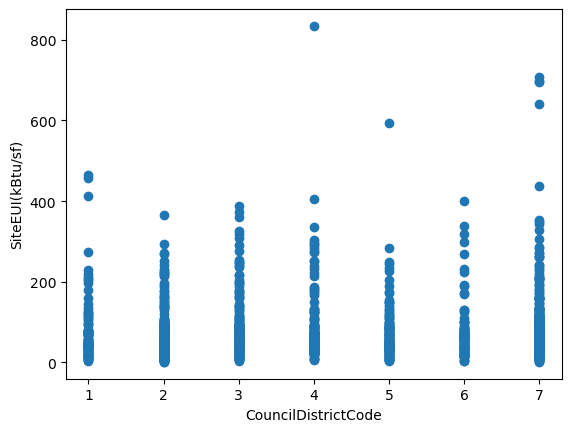

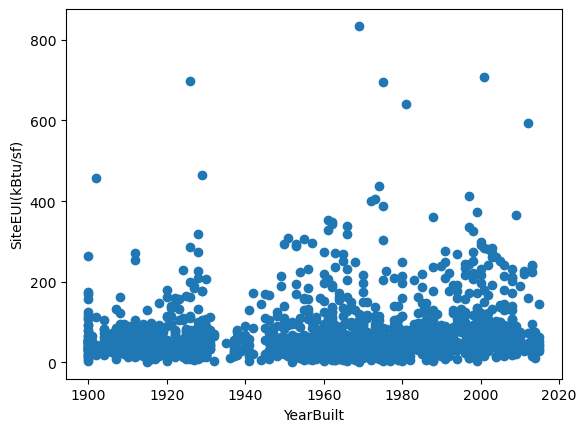

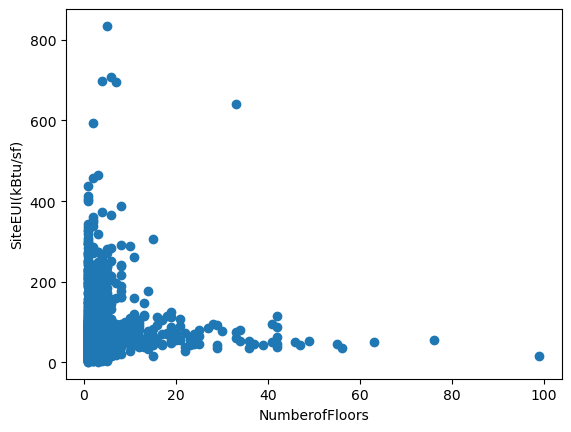

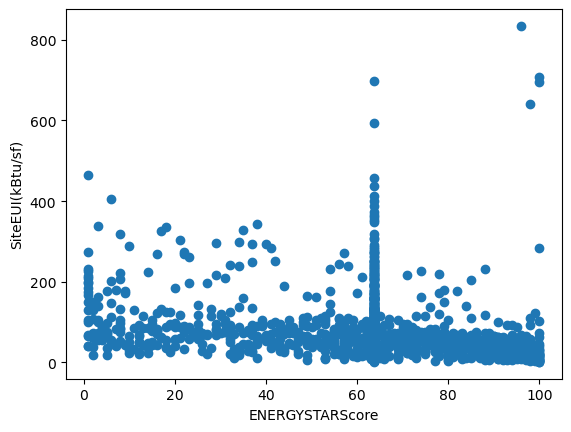

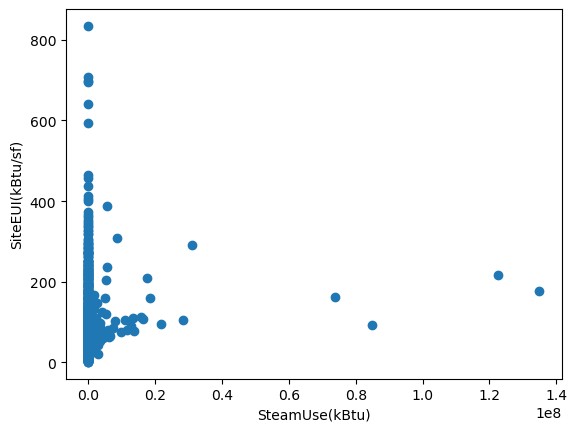

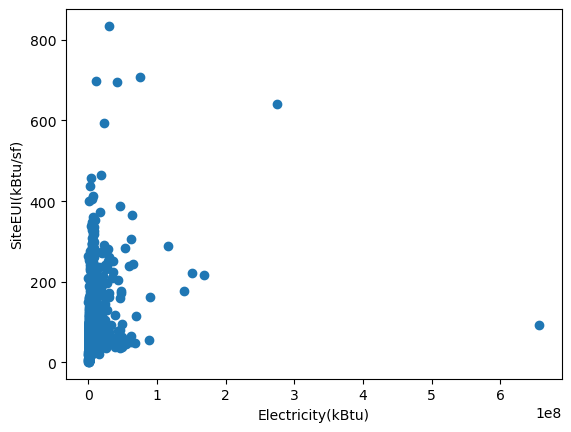

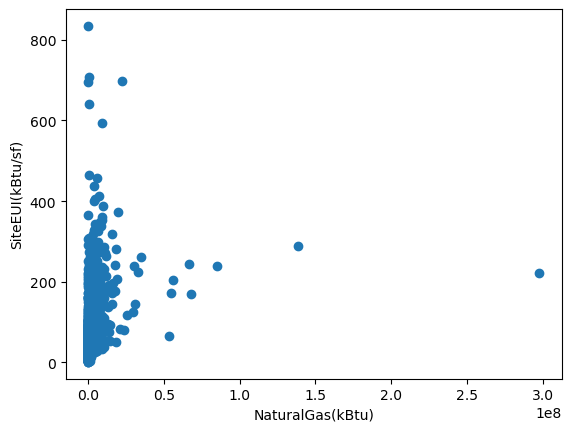

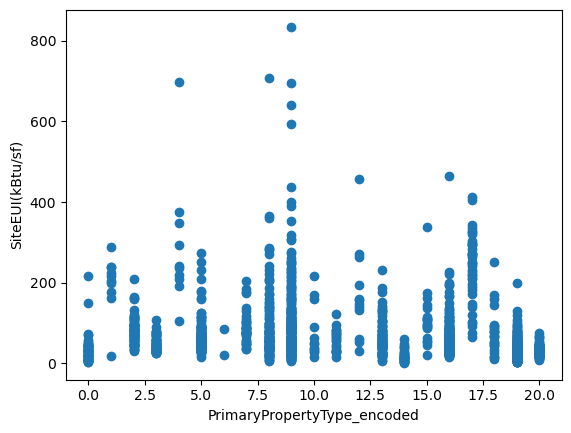

In [59]:
for variable in consommation_variables:
    plt.scatter(data[variable], data[c_dependent_variable])
    plt.xlabel(variable)
    plt.ylabel(c_dependent_variable)
    plt.show()

## 4.2. préparation des données

In [60]:
# créer la matrice de données
X = data[consommation_variables].values

# créer le vecteur d'étiquettes
y = data[c_dependent_variable].values

In [61]:
print(y)

[ 81.69999695  94.80000305  96.         ... 438.2000122   51.
  63.09999847]


In [62]:
# séparation de train et test 
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.2)

In [63]:
# normalisation
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [64]:
print("X_train shape:", X_train.shape)


X_train shape: (1236, 8)



## 4.3 Choix de modèle et noyau
### 4.3.1 Modèle avec noyau linéaire (baseline)

In [65]:
model = LinearRegression()
model.fit(X_train_std, y_train)

LinearRegression()

In [66]:
y_pred = model.predict(X_test_std)
mse = mean_squared_error(y_test, y_pred)
print("MSE : {:.2f}".format(mse))

MSE : 5209.48


In [67]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 72.18


In [68]:
# Entraîner un modèle de régression Ridge à noyau
model = KernelRidge(alpha=1, kernel='linear')
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
mse = mean_squared_error(y_test, y_pred)
print("MSE : {:.2f}".format(mse))

MSE : 11521.31


In [69]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 107.34


### 4.3.2 Modèle avec noyau rbf

In [70]:
# Entraîner un modèle de régression Ridge à noyau
model = KernelRidge(alpha=1, kernel='rbf', gamma=0.01)
model.fit(X_train_std, y_train)

KernelRidge(gamma=0.01, kernel='rbf')

In [71]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test_std)
# Calculer l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 3948.3722281112687


In [72]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 62.84


Le MSE et RMSE est meilleure que le baseline

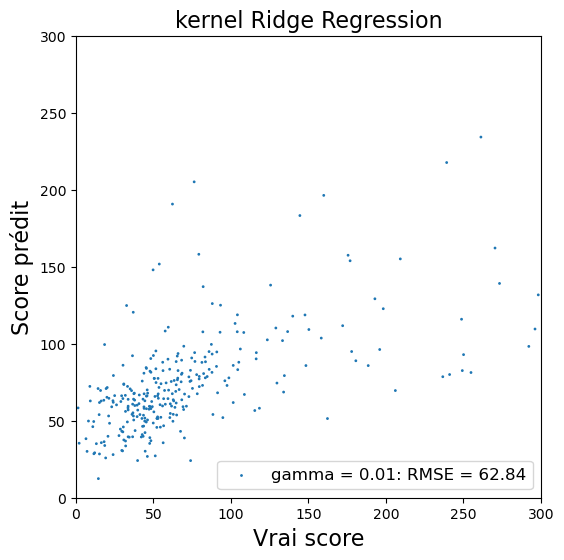

In [73]:
# créer une figure
fig = plt.figure(figsize=(6, 6))

# Compter, pour chaque paire de valeurs (y, y') où y est un vrai score et y' le score prédit,
# le nombre de ces paires.
# Ce nombre sera utilisé pour modifier la taille des marqueurs correspondants 
# dans un nuage de points
sizes = {}
for (yt, yp) in zip(list(y_test), list(y_pred)):
    if (yt, yp) in sizes.keys():
        sizes[(yt, yp)] += 1
    else:
        sizes[(yt, yp)] = 1        
keys = sizes.keys()

# afficher les prédictions
plt.scatter([k[0] for k in keys], 
            [k[1] for k in keys], 
             s=[sizes[k] for k in keys], 
            label="gamma = 0.01: RMSE = {:.2f}".format(rmse))

# étiqueter les axes et le graphique
plt.xlabel('Vrai score', fontsize=16)
plt.ylabel(u'Score prédit', fontsize=16)
plt.title('kernel Ridge Regression', fontsize=16)

# limites des axes
plt.xlim([0, 300])
plt.ylim([0, 300])

# afficher la légende
plt.legend(loc="lower right", fontsize=12)


### 4.3.3 Adapter hyperparamètre
cherche la valeur optimale de hyperparamètres alpha et gamma

In [74]:
# valeurs du paramètre C
alpha_range = np.logspace(-2, 2, 5)

# valeurs du paramètre gamma
gamma_range = np.logspace(-2, 1, 4)

# grille de paramètres
param_grid = {'alpha': alpha_range, 'gamma': gamma_range}

# score pour sélectionner le modèle optimal
score = 'neg_root_mean_squared_error'

# initialiser la validation croisée
grid_pred = model_selection.GridSearchCV( \
        kernel_ridge.KernelRidge(kernel='rbf'),
        param_grid,
        cv=5,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred.fit(X_train_std, y_train)

# prédire sur le jeu de test avec le modèle sélectionné 
y_test_pred_cv = grid_pred.predict(X_test_std)

# calculer la RMSE correspondante
rmse_cv = np.sqrt(mean_squared_error(y_test, y_test_pred_cv))

# afficher les paramètres optimaux
#print("The optimal parameters are {} with a score of {:.2f}".format(grid_pred.best_params_, grid_pred.best_score_))
print("RMSE: {:.2f}".format(rmse_cv))


RMSE: 60.41
